In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SaaS Sales Capstone
*Author:* Lutfi Aryadi Sukmono

#### 📑 Data Dictionary – SaaS Sales
1. Row ID: Identitas untuk setiap transaksi.
2. Order ID: Identitas untuk setiap pesanan.
3. Order Date: Tanggal saat pesanan dibuat.
4. Date Key: Representasi numerik dari tanggal pesanan (YYYYMMDD).
5. Contact Name: Nama orang yang melakukan pesanan.
6. Country: Negara tempat pesanan dibuat.
7. City: Kota tempat pesanan dibuat.
8. Region: Wilayah tempat pesanan dibuat.
9. Subregion: Subwilayah tempat pesanan dibuat.
10. Customer: Nama perusahaan yang melakukan pesanan.
11. Customer ID: Identitas untuk setiap pelanggan.
12. Industry: Industri tempat pelanggan berada.
13. Segment: Segmen pelanggan (SMB, Strategic, Enterprise, dll).
14. Product: Produk yang dipesan.
15. License: Kunci lisensi untuk produk.
16. Sales: Jumlah total penjualan untuk transaksi.
17. Quantity: Jumlah total barang dalam transaksi.
18. Discount: Diskon yang diterapkan pada transaksi.
19. Profit: Keuntungan dari transaksi.
20. Final Segment: Segmen akhir yang sudah ditentukan by Sales.

# A. Latar Belakang
SaaS (Software as a Service) merupakan model bisnis yang menyediakan layanan perangkat lunak berbasis cloud, di mana pengguna dapat mengakses aplikasi dengan sistem pembayaran rutin (subscription).
Perusahaan yang bergerak di bidang penjualan SaaS perlu mengetahui penjualan produknya agar dapat menentukan strategi bisnis yang tepat. Salah satu aspek penting adalah bagaimana penjualan (Sales) dan profitabilitas dapat dipengaruhi oleh pemberian Discount.

# B. Rumusan Masalah
Perusahaan ingin mengetahui pengaruh pemberian diskon (Discount) terhadap penjualan dan profitabilitas yang didapatkan dari tahun 2020-2023 pada setiap segment

Hal ini penting untuk menjawab pertanyaan berikut:
1. Segment apa yang paling banyak melakukan penjualan based on sales (revenue dan quantity) ?
2. Segment apa yang paling banyak mendorong profitabilitas pada perusahaan ?
3. Apakah dengan pemberian diskon dapat meningkatkan sales secara revenue dan quantity serta meningkatkan profitabilitas pada setiap segment ?

# C. Tujuan Analisa
Analisis yang saya buat bertujuan untuk menjawab rumusan masalah yaitu:

1. Mengidentifikasi segment apa yang paling banyak melakukan penjualan based on sales (revenue dan quantity)
2. Mengidentifikasi segment apa yang paling profitable.
2. Menganalisis hubungan pemberian diskon antara penjualan based on sales (revenue dan quantity) dan profitabilitas.


# D. Pemahaman Dataset dan Proses Cleaning Data
Pemahaman dataset merupakan tahap awal sebelum melakukan analisis lebih lanjut. Pada tahap ini, dilakukan eksplorasi terhadap isi data untuk mengetahui struktur, tipe data, jumlah baris dan kolom, serta anomali atau ketidaksesuaian yang mungkin ada.
Setelah pemahaman data, dilakukan proses cleaning (pembersihan data). Cleaning data bertujuan untuk memastikan data dalam kondisi rapi, konsisten, dan siap dianalisis

In [42]:
url = 'https://raw.githubusercontent.com/Lutfiaryadi/CapstoneProjectM2/refs/heads/main/SaaS-Sales.csv'
df = pd.read_csv(url)
display(df.head(), df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [43]:
df.info()
print(f'Jumlah data baris dan kolom adalah {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Diketahui terdapat 9994 baris dan 19 kolom

In [44]:
# Menampilkan kolom data unik pada dataset 
unique_counts = []
for col in df.columns :
    unique_counts.append([col, df[col].nunique(), df[col].unique()])

unique_countsDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique_counts)
# Tampilkan hasil
unique_countsDesc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


In [45]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [46]:
# Mencari missing value
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak terdapat missing value sehingga tidak diperlukannya handling missing value

In [47]:
# Mencari data duplicate
df.duplicated().sum()
df[df.duplicated()]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Tidak ada data duplicate, jadi semua data unik

In [48]:
# Ubah type data untuk dilakukan analisa

# 1. Konversi Order Date to type data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 2. Konversi Date Key to type data datetime
df['Date Key'] = pd.to_datetime(df['Date Key'], format = '%Y%m%d')

# 3. Ubah Customer ID to type data string
df['Customer ID'] = df['Customer ID'].astype(str)

In [49]:
print(df.dtypes)
df.head()

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key        datetime64[ns]
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID             object
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Konsistensi data type agar data bisa diproses dan dilakukan analisa

In [50]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# E. Proses Analisa
Untuk menjawab rumusan masalah, pertama dilakukan pengecekan terhadap total sales per customer untuk dimasukan ke dalam final segment karena masih ada data unik customer yang tergolong masuk ke dalam beberapa segment.
Kemudian dilakukan analisa lebih lanjut.

In [51]:
# Menghitung jumlah customer unik per segment
customer = df.groupby('Segment')['Customer ID'].nunique().reset_index()
customer.rename(columns={'Customer ID': 'Total Customers'}, inplace=True)

print(customer)

      Segment  Total Customers
0  Enterprise               76
1         SMB               96
2   Strategic               91


Terdapat Customer unik di segment Enterprise sebanyak 76, SMB 96 dan Strategic 91

In [53]:
# Menghitung jumlah sales per customer
customer_sales = df.groupby('Customer ID')['Sales'].sum().reset_index()
print(customer_sales.head())

  Customer ID       Sales
0        1001  12617.1140
1        1002  27278.5930
2        1003  39941.6400
3        1004  23189.2165
4        1005  33514.9210


In [54]:
# Mencari nilai mean & std
mean_sales = customer_sales['Sales'].mean()
std_sales = customer_sales['Sales'].std()

lower_bound = mean_sales - std_sales
upper_bound = mean_sales + std_sales

print(f'Mean: {mean_sales}, Std: {std_sales}')
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Mean: 23204.049093939386, Std: 10006.663857385294
Lower Bound: 13197.385236554092, Upper Bound: 33210.71295132468


#### Hal di atas bertujuan untuk mengkategorikan setiap customer masuk ke dalam kategori segment yang mana (Final Segment)

In [55]:
# Membuat final segment untuk mengkategorikan Customer masuk ke dalam segment yang mana
def assign_segment(Sales):
    if Sales < lower_bound:
        return 'SMB'
    elif Sales < upper_bound:
        return 'Enterprise'
    else:
        return 'Strategic'
    
customer_sales['Final Segment'] = customer_sales['Sales'].apply(assign_segment)
customer_sales.head()

,Customer ID,Sales,Final Segment
0,1001,12617.1140,SMB
1,1002,27278.5930,Enterprise
2,1003,39941.6400,Strategic
3,1004,23189.2165,Enterprise
4,1005,33514.9210,Strategic


In [56]:
# Menggabungkan Final Segment ke dalam dataset

df = df.merge(customer_sales[['Customer ID', 'Final Segment']], on='Customer ID', how='left')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Final Segment
0,1,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Strategic
1,2,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Strategic
2,3,AMER-2022-138688,2022-06-13,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Enterprise
3,4,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Enterprise
4,5,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Enterprise


#### Didapatkan kategori final segment dari setiap customer. Hal tersebut dilakukan untuk analisa per segment lebih lanjut

In [57]:
# Copy dataset ke dataset yang sudah cleaned
df_cleaned = df.copy()

In [58]:
# Export ke file baru
df_cleaned.to_csv(
    'AWS_SaaS_Sales_Cleaned.csv',
    index=False
)

In [59]:
df_check = pd.read_csv(
    r"D:/Data Lutfi/0. Purwadhika/2. SQL/Capstone Project/Final/AWS_SaaS_Sales_Cleaned.csv"
)
print(df_check.shape)
df_check.head()

(9994, 20)


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Final Segment
0,1,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Strategic
1,2,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Strategic
2,3,AMER-2022-138688,2022-06-13,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Enterprise
3,4,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Enterprise
4,5,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Enterprise


In [60]:
df_cleaned.isnull().values.any()

np.False_

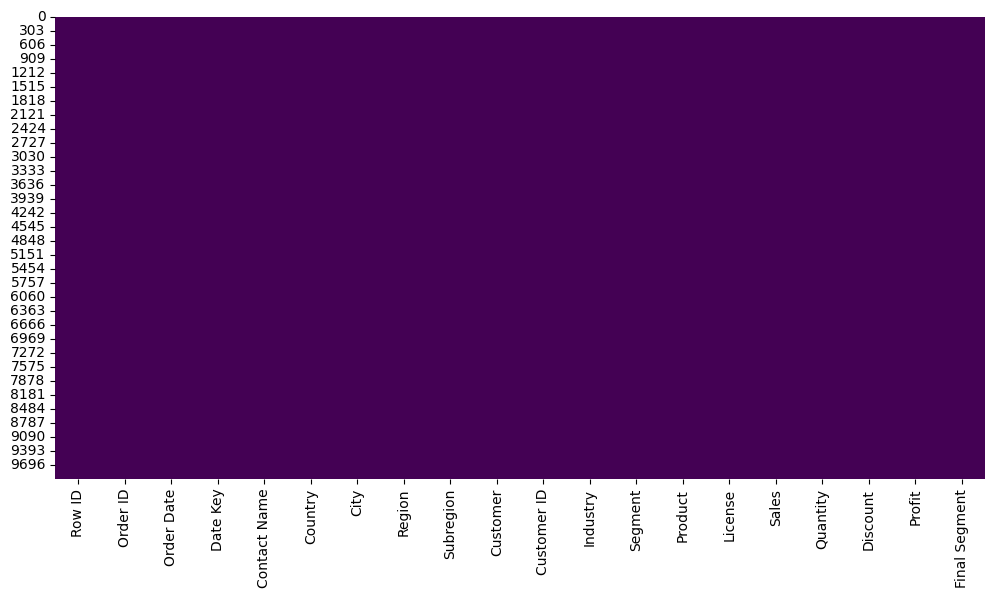

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="viridis")
plt.show()

In [62]:
pd.concat([df_cleaned.head(),df.tail()])

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Final Segment
0,1,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Strategic
1,2,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Strategic
2,3,AMER-2022-138688,2022-06-13,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Enterprise
3,4,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Enterprise
4,5,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Enterprise
9989,9990,EMEA-2020-110422,2020-01-22,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,Enterprise
9990,9991,AMER-2023-121258,2023-02-27,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,Strategic
9991,9992,AMER-2023-121258,2023-02-27,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,Strategic
9992,9993,AMER-2023-121258,2023-02-27,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,Strategic
9993,9994,AMER-2023-119914,2023-05-05,2023-05-05,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.1600,2,0.00,72.9480,Enterprise


In [64]:
# Menghitung jumlah customer per segment
customer_count = df_cleaned.groupby('Final Segment')['Customer ID'].nunique().reset_index()
customer_count.rename(columns={'Customer ID': 'Total Customers'}, inplace=True)

customer_count

,Final Segment,Total Customers
0,Enterprise,63
1,SMB,18
2,Strategic,18


Enterprise memiliki customer yang paling tinggi sebanyak 63 Customer dibandingkan SMB dan Strategic 18 Customer

In [65]:
# Menghitung jumlah transaksi per segment
transactions_per_segment = df_cleaned.groupby('Final Segment')['Order ID'].count().reset_index().rename(columns={'Order ID':'Total Transactions'})

transactions_per_segment

,Final Segment,Total Transactions
0,Enterprise,6440
1,SMB,1073
2,Strategic,2481


Summary Sales per Segment:
  Final Segment       Sales Avg Sales per Customer
0    Enterprise  $1,406,635             $22,327.54
1           SMB    $185,599             $10,311.03
2     Strategic    $704,967             $39,164.84


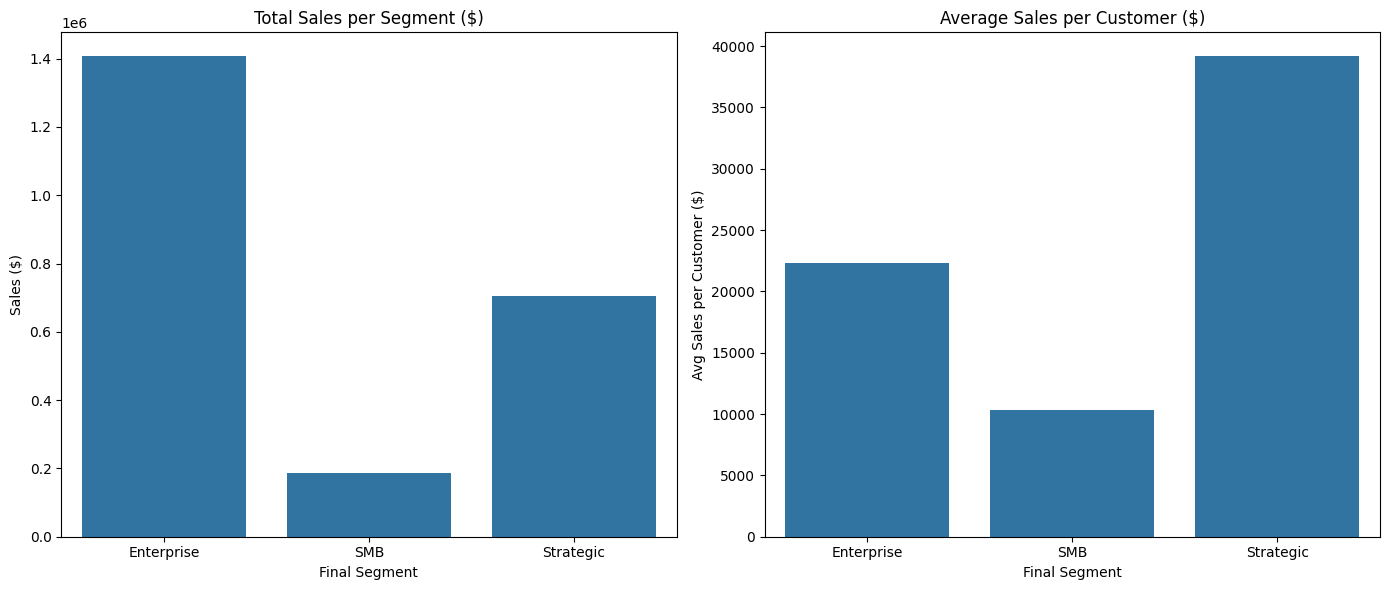

In [66]:
# Summary Sales
sales_per_segment = df_cleaned.groupby('Final Segment').agg({
    'Sales': 'sum'
}).reset_index()

avg_sales_segment = (
    df_cleaned.groupby('Final Segment')['Sales'].sum() /
    df_cleaned.groupby('Final Segment')['Customer ID'].nunique()
).reset_index(name='Avg Sales per Customer')

summary_sales = pd.merge(sales_per_segment, avg_sales_segment, on='Final Segment')

# Simpan versi numeric untuk plot
plot_data = summary_sales.copy()

# Ubah satuan agar mudah dibaca di tabel
summary_sales['Sales'] = summary_sales['Sales'].apply(lambda x: f'${x:,.0f}')
summary_sales['Avg Sales per Customer'] = summary_sales['Avg Sales per Customer'].apply(lambda x: f'${x:,.2f}')

print("Summary Sales per Segment:")
print(summary_sales)

# Visualisasi Barplot
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Total Sales
sns.barplot(data=plot_data, x='Final Segment', y='Sales', ax=axes[0])
axes[0].set_title('Total Sales per Segment ($)')
axes[0].set_ylabel('Sales ($)')

# Avg Sales per Customer
sns.barplot(data=plot_data, x='Final Segment', y='Avg Sales per Customer', ax=axes[1])
axes[1].set_title('Average Sales per Customer ($)')
axes[1].set_ylabel('Avg Sales per Customer ($)')

plt.tight_layout()
plt.show()

Dari hasil diatas dapat disimpulkan bahwa segment Enterprise menyumbang revenue total paling tinggi karena punya basis customer yang lebih banyak dibandingkan segment lain. Namun, segment Strategic memiliki rata-rata penjualan per customer yang lebih tinggi karena customer di segment ini biasanya melakukan pembelian dengan nilai transaksi lebih besar (big deal), walaupun jumlah customer-nya lebih sedikit. Dengan kata lain, Enterprise unggul di kuantitas, sedangkan Strategic unggul di nilai transaksi per customernya (Customer High Value).

Summary Quantity per Segment:
  Final Segment     Quantity Avg Quantity per Customer
0    Enterprise  24,313 unit               385.92 unit
1           SMB   4,008 unit               222.67 unit
2     Strategic   9,552 unit               530.67 unit


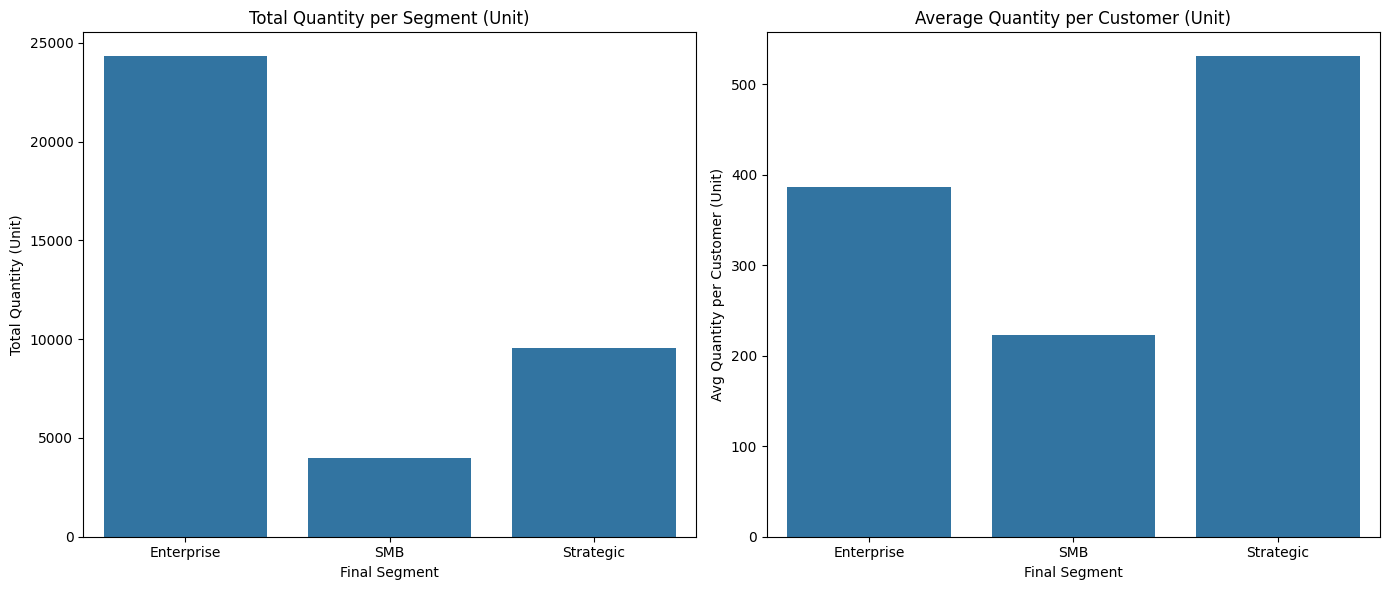

In [67]:
# Summary Quantity
quantity_per_segment = df_cleaned.groupby('Final Segment').agg({
    'Quantity': 'sum'
}).reset_index()

avg_quantity_segment = (
    df_cleaned.groupby('Final Segment')['Quantity'].sum() /
    df_cleaned.groupby('Final Segment')['Customer ID'].nunique()
).reset_index(name='Avg Quantity per Customer')

summary_quantity = pd.merge(quantity_per_segment, avg_quantity_segment, on='Final Segment')

# Simpan versi numeric untuk plotting
plot_quantity = summary_quantity.copy()

# Format biar rapi untuk tabel
summary_quantity['Quantity'] = summary_quantity['Quantity'].apply(lambda x: f'{x:,.0f} unit')
summary_quantity['Avg Quantity per Customer'] = summary_quantity['Avg Quantity per Customer'].apply(lambda x: f'{x:,.2f} unit')

print("Summary Quantity per Segment:")
print(summary_quantity)

# Visualisasi Barplot 

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Total Quantity
sns.barplot(data=plot_quantity, x='Final Segment', y='Quantity', ax=axes[0])
axes[0].set_title('Total Quantity per Segment (Unit)')
axes[0].set_ylabel('Total Quantity (Unit)')

# Avg Quantity per Customer
sns.barplot(data=plot_quantity, x='Final Segment', y='Avg Quantity per Customer', ax=axes[1])
axes[1].set_title('Average Quantity per Customer (Unit)')
axes[1].set_ylabel('Avg Quantity per Customer (Unit)')

plt.tight_layout()
plt.show()


Secara perbandingan revenue dan quantity, segment Enterprise memberikan kontribusi penjualan terbesar baik dari sisi revenue maupun quantity. Hal ini disebabkan jumlah customer pada segment Enterprise yang relatif lebih banyak dibanding segment lain. Namun, bila dilihat dari rata-rata per customer, segment Strategic justru menunjukkan nilai yang lebih tinggi, baik dari sisi revenue maupun quantity. Artinya, meskipun jumlah customer pada segment Strategic lebih sedikit, setiap customer di segment ini cenderung melakukan transaksi dengan nilai yang lebih besar (big deal) dan membeli dalam jumlah lebih banyak.

  Final Segment   Profit Avg Profit per Customer
0    Enterprise  167,857                2,664.40
1           SMB   22,819                1,267.71
2     Strategic   95,721                5,317.85


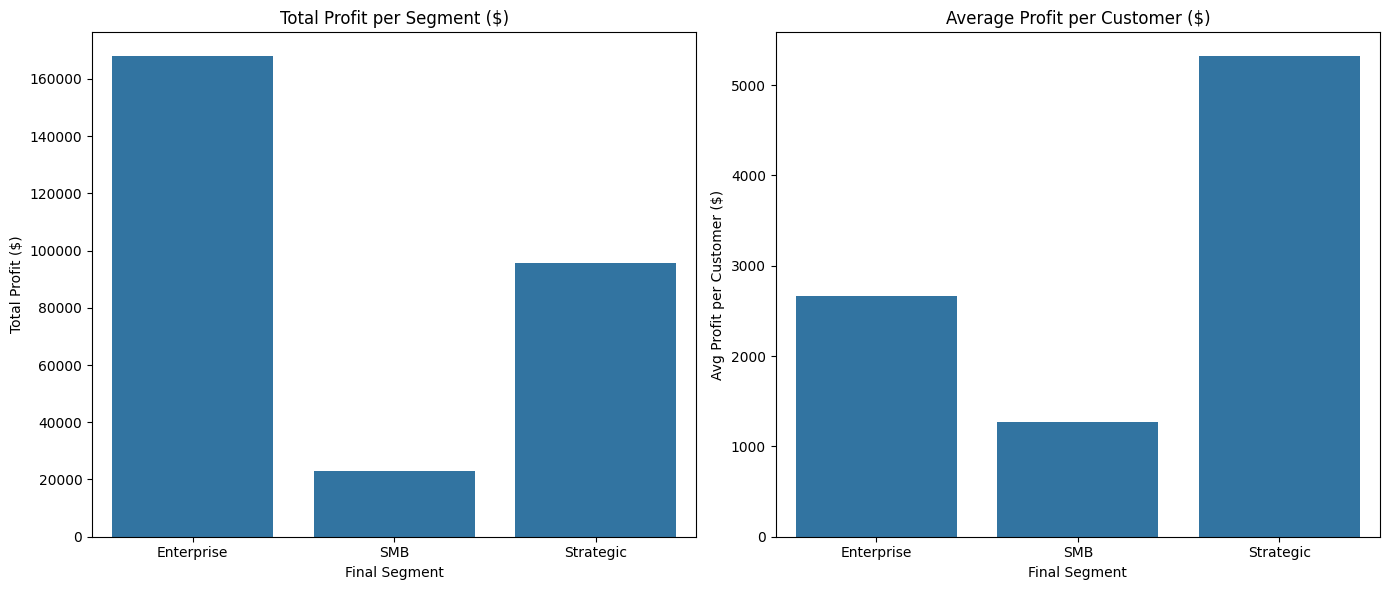

In [68]:
# Menghitung jumlah Profit per segment
profit_per_segment = df_cleaned.groupby('Final Segment').agg({
    'Profit': 'sum'
}).reset_index()

# Menghitung rata-rata Profit per Customer
avg_profit_customer = ( 
    df_cleaned.groupby('Final Segment')['Profit'].sum() /
    df_cleaned.groupby('Final Segment')['Customer ID'].nunique()
).reset_index(name='Avg Profit per Customer')

summary_profit = pd.merge(profit_per_segment, avg_profit_customer, on='Final Segment')

# Simpan versi numeric untuk plotting
plot_profit = pd.merge(profit_per_segment, avg_profit_customer, on='Final Segment')

summary_profit['Profit'] = summary_profit['Profit'].apply(lambda x: f'{x:,.0f}')
summary_profit['Avg Profit per Customer'] = summary_profit['Avg Profit per Customer'].apply(lambda x: f"{x:,.2f}")

print(summary_profit)

# Visualisasi Barplot
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Total Profit
sns.barplot(data=plot_profit, x='Final Segment', y='Profit', ax=axes[0])
axes[0].set_title('Total Profit per Segment ($)')
axes[0].set_ylabel('Total Profit ($)')

# Avg Profit per Customer
sns.barplot(data=plot_profit, x='Final Segment', y='Avg Profit per Customer', ax=axes[1])
axes[1].set_title('Average Profit per Customer ($)')
axes[1].set_ylabel('Avg Profit per Customer ($)')

plt.tight_layout()
plt.show()

Dari sisi profitabilitas, segment Enterprise menyumbang profit terbesar secara total dengan nilai $167.857. Namun, bila dianalisis lebih lanjut berdasarkan rata-rata profit per customer, segment Strategic menunjukkan hasil lebih baik dengan rata-rata $5.317,85 per customer, hampir dua kali lipat dibanding Enterprise. Hal ini mengindikasikan bahwa meskipun jumlah customer pada segment Strategic lebih sedikit, mereka cenderung memberikan kontribusi profit yang lebih tinggi per transaksi. Sedangkan, segment SMB memberikan kontribusi profit paling rendah baik secara total maupun rata-rata.

In [69]:
# Mencari min dan max discount per segment
discount_range_segment = df_cleaned.groupby("Final Segment")["Discount"].agg(["min","max"]).reset_index()

# Ubah ke persen biar lebih gampang dibaca
discount_range_segment["min"] = discount_range_segment["min"] * 100
discount_range_segment["max"] = discount_range_segment["max"] * 100

discount_range_segment.rename(columns={"min":"Min Discount (%)", "max":"Max Discount (%)"}, inplace=True)

print(discount_range_segment)

  Final Segment  Min Discount (%)  Max Discount (%)
0    Enterprise               0.0              80.0
1           SMB               0.0              80.0
2     Strategic               0.0              80.0


  Final Segment Avg Discount (%) Median Discount (%)
0    Enterprise           15.69%              20.00%
1           SMB           15.89%              20.00%
2     Strategic           15.31%              15.00%


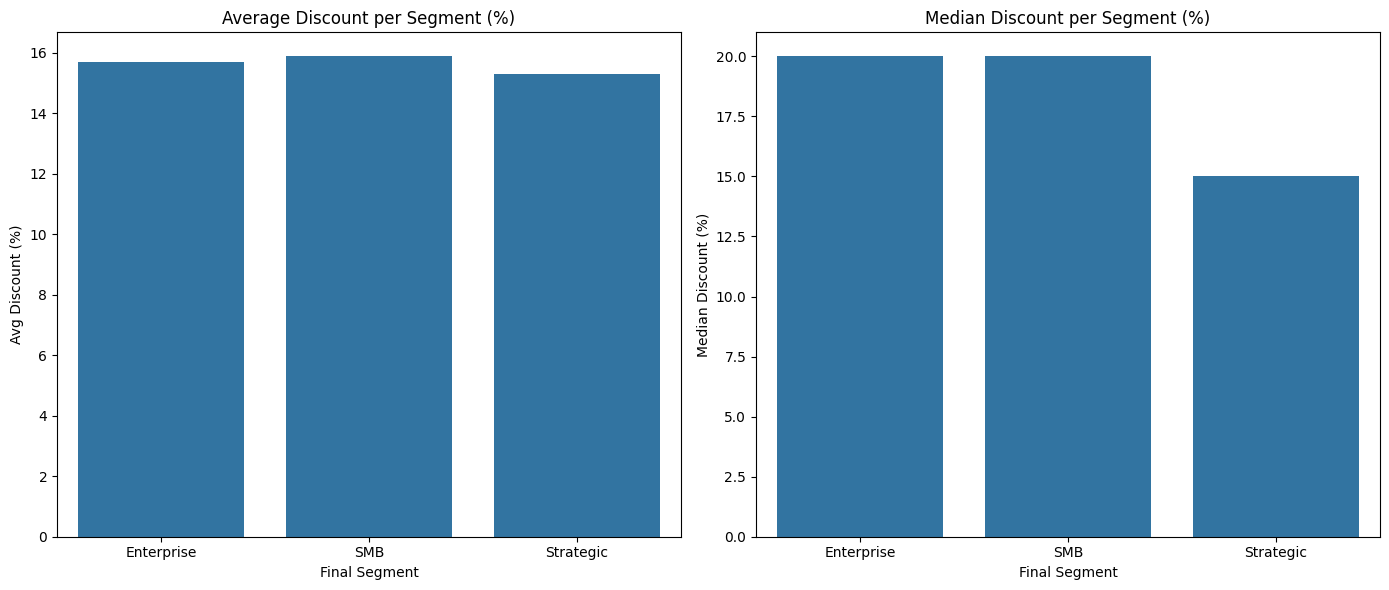

In [70]:
# Rata-rata Discount per segment
avg_discount_segment = (
    df_cleaned.groupby('Final Segment')['Discount'].mean() * 100
).reset_index(name='Avg Discount (%)')

# Median Discount per segment
median_discount_segment = (
    df_cleaned.groupby('Final Segment')['Discount'].median() * 100
).reset_index(name='Median Discount (%)')

summary_discount = pd.merge(avg_discount_segment, median_discount_segment, on='Final Segment')

# Ubah satuan
summary_discount['Avg Discount (%)'] = summary_discount['Avg Discount (%)'].apply(lambda x: f'{x:.2f}%')
summary_discount['Median Discount (%)'] = summary_discount['Median Discount (%)'].apply(lambda x: f'{x:.2f}%')

print(summary_discount)

# Versi numeric untuk plotting
plot_discount = pd.merge(
    df.groupby('Final Segment')['Discount'].mean().reset_index(name='Avg Discount'),
    df.groupby('Final Segment')['Discount'].median().reset_index(name='Median Discount'),
    on='Final Segment'
)

# Ubah ke persentase
plot_discount['Avg Discount'] = plot_discount['Avg Discount'] * 100
plot_discount['Median Discount'] = plot_discount['Median Discount'] * 100

# --- Visualisasi Barplot ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Average Discount
sns.barplot(data=plot_discount, x='Final Segment', y='Avg Discount', ax=axes[0])
axes[0].set_title('Average Discount per Segment (%)')
axes[0].set_ylabel('Avg Discount (%)')

# Median Discount
sns.barplot(data=plot_discount, x='Final Segment', y='Median Discount', ax=axes[1])
axes[1].set_title('Median Discount per Segment (%)')
axes[1].set_ylabel('Median Discount (%)')

plt.tight_layout()
plt.show()


Segment SMB memiliki rata-rata diskon tertinggi 15,89% dengan median 20%. Hal ini menunjukkan bahwa customer SMB bisa dikatakan cenderung lebih sensitif terhadap harga dan memerlukan potongan harga lebih besar untuk menaikan penjualan.

Segment Enterprise juga memiliki median diskon 20% dengan rata-rata diskon 15,69%. Artinya, meskipun Enterprise merupakan penyumbang revenue, quantity, dan profit terbesar secara total, mereka tetap mendapatkan insentif diskon yang cukup tinggi.

Segment Strategic justru memiliki rata-rata diskon terendah 15,31% dengan median 15%. Hal ini mengindikasikan bahwa customer Strategic relatif tidak terlalu bergantung pada diskon untuk melakukan pembelian, karena mereka lebih sering melakukan transaksi besar (big deal) meski dengan potongan harga lebih kecil.

Summary Profit Margin per Segment:
  Final Segment       Sales    Profit Profit Margin (%)
0    Enterprise  $1,406,635  $167,857            11.93%
1           SMB    $185,599   $22,819            12.29%
2     Strategic    $704,967   $95,721            13.58%


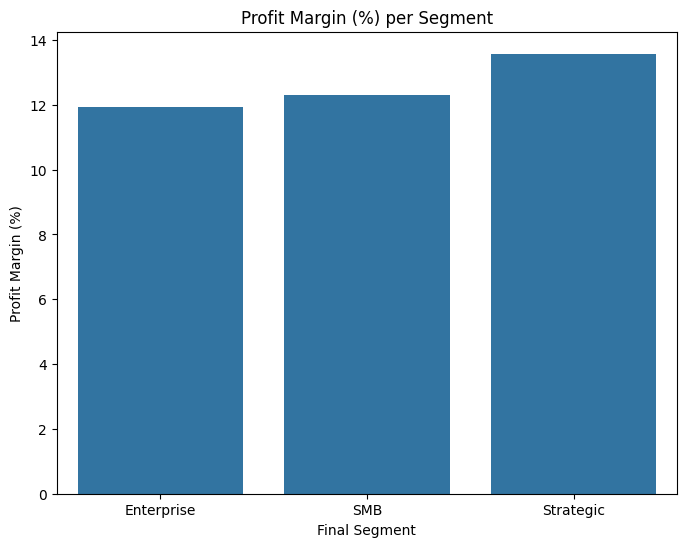

In [71]:
# Hitung Profit Margin per Segment
margin_seg = df_cleaned.groupby('Final Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Buat kolom numeric (untuk plot)
margin_seg['Profit Margin Num'] = (margin_seg['Profit'] / margin_seg['Sales']) * 100

# Buat kolom string (untuk print)
margin_seg['Sales'] = margin_seg['Sales'].apply(lambda x: f'${x:,.0f}')
margin_seg['Profit'] = margin_seg['Profit'].apply(lambda x: f'${x:,.0f}')
margin_seg['Profit Margin (%)'] = margin_seg['Profit Margin Num'].apply(lambda x: f'{x:.2f}%')

print('Summary Profit Margin per Segment:')
print(margin_seg[['Final Segment','Sales','Profit','Profit Margin (%)']])

# Visualisasi pakai kolom numeric
plt.figure(figsize=(8,6))
sns.barplot(
    data=margin_seg,
    x='Final Segment',
    y='Profit Margin Num'
)
plt.title('Profit Margin (%) per Segment')
plt.ylabel('Profit Margin (%)')
plt.show()

In [72]:
# Menghitung summary per Final Segment
summary = df_cleaned.groupby('Final Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Customer ID': 'nunique',  # jumlah customer unik
    'Discount': 'mean'         # rata-rata diskon
}).reset_index()

# Menghitung rata-rata Discount per segment (dalam %)
summary['Avg Discount (%)'] = df.groupby('Final Segment')['Discount'].mean().values * 100

# Menghitung rata-rata Sales per customer
summary['Avg Sales per Customer'] = summary['Sales'] / summary['Customer ID']

# Ubah satuan
summary['Sales'] = summary['Sales'].apply(lambda x: f'${x:,.0f}')
summary['Profit'] = summary['Profit'].apply(lambda x: f'${x:,.0f}')
summary['Quantity'] = summary['Quantity'].apply(lambda x: f'{x:,.0f} unit')
summary['Avg Sales per Customer'] = summary['Avg Sales per Customer'].apply(lambda x: f'${x:,.2f}')
summary['Avg Discount (%)'] = summary['Avg Discount (%)'].apply(lambda x: f'{x:.2f}%')

summary

,Final Segment,Sales,Profit,Quantity,Customer ID,Discount,Avg Discount (%),Avg Sales per Customer
0,Enterprise,"$1,406,635","$167,857","24,313 unit",63,0.156947,15.69%,"$22,327.54"
1,SMB,"$185,599","$22,819","4,008 unit",18,0.158882,15.89%,"$10,311.03"
2,Strategic,"$704,967","$95,721","9,552 unit",18,0.153112,15.31%,"$39,164.84"


# F. Hasil

### Hasil secara garis besarnya adalah :

1. **Enterprise**
Menjadi segment terbesar dalam kontribusi penjualan baik dari sisi Revenue ($1.406.635) maupun Quantity (24.313 unit).
Juga menyumbang Profit tertinggi ($167.857) karena jumlah customer yang lebih banyak dibandingkan segment lain.
Kekuatan utama Enterprise ada pada volume transaksi: banyak customer, transaksi sering, walaupun nilai rata-rata per customer relatif lebih rendah dibanding Strategic.
Segment ini cocok difokuskan pada strategi mass-market dengan pengelolaan efisiensi, karena stabil mendorong profit dalam jumlah besar.

2. **Strategic**
Walau jumlah customer lebih sedikit, rata-rata transaksi per customer sangat besar: Avg Sales per Customer = $39.164 jauh lebih tinggi dibanding Enterprise maupun SMB.
Segment ini cenderung menghasilkan transaksi dengan nilai besar (big deal customers).
Kekuatan utama Strategic ada pada kualitas customer: lebih sedikit customer, tapi loyal, berbelanja dalam jumlah besar, dan profit per customer tinggi.
Segment ini sangat potensial untuk difokuskan dalam strategi relationship management (account management) agar bisa dipertahankan dan ditumbuhkan lebih lanjut.

3. **SMB (Small-Medium Business)**
Memberikan kontribusi paling kecil: Revenue $185.599, Profit $22.819, dan Quantity 4.008 unit.
Rata-rata per customer pun rendah ($10.311 per customer) dibanding dua segment lainnya.
SMB justru membutuhkan diskon paling tinggi (15,89%) untuk mendorong transaksi, sehingga dari sisi efisiensi profitabilitas kurang optimal.
Segment ini cenderung kurang efektif untuk menjadi prioritas, tetapi tetap bisa dipelihara dengan strategi low-cost acquisition atau difokuskan hanya pada produk tertentu yang lebih sesuai.

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

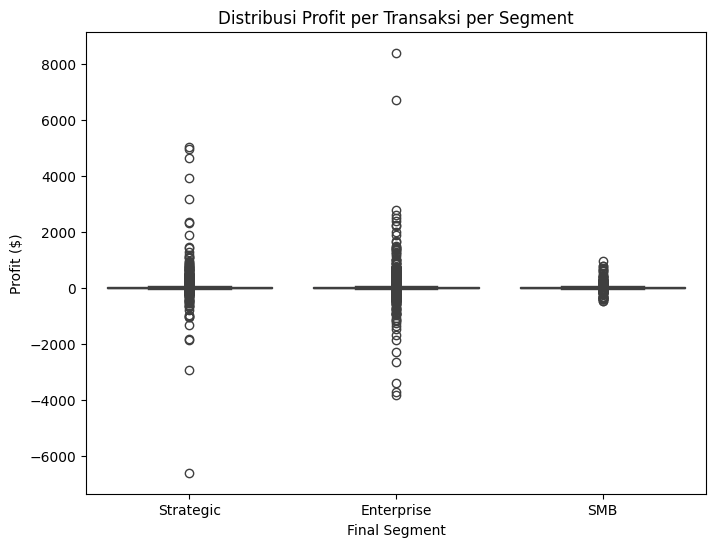

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cleaned, x='Final Segment', y='Profit')
plt.title('Distribusi Profit per Transaksi per Segment')
plt.ylabel('Profit ($)')
plt.show()

1. Pada segment **Strategic**, sebagian besar transaksi punya profit mendekati nol (median dekat 0). Ada cukup banyak outlier, baik positif (profit ± $5.000) maupun negatif (rugi ± $6.000) yang artinya transaksi di segment ini berisiko tinggi → ada kemungkinan untung besar tapi juga rugi besar.

2. Pada segment **Enterprise**, distribusinya mirip dengan Strategic, median profit juga kecil dan mendekati nol. Outlier positif lebih tinggi lagi, mencapai lebih dari $8.000, ada juga beberapa outlier negatif yang besar. Artinya segment ini juga punya variabilitas tinggi, dengan beberapa transaksi nominal besar.

3. Pada segment **SMB**, distribusinya paling sempit dan konsisten dibanding dua segment lainnya. Profit per transaksi mayoritas kecil, outlier relatif sedikit.
Artinya adalah transaksi SMB lebih stabil tapi kontribusinya kecil, secara skala keuntungan dan kerugian hampir sama.

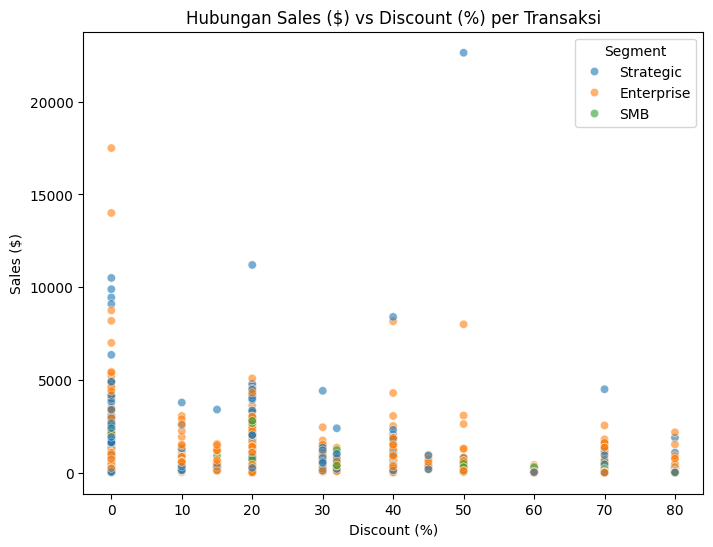

In [74]:
df_cleaned['Discount_pct'] = df_cleaned['Discount'] * 100

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Discount_pct', y='Sales', hue='Final Segment', alpha=0.6)

plt.title('Hubungan Sales ($) vs Discount (%) per Transaksi')
plt.xlabel('Discount (%)')
plt.ylabel('Sales ($)')
plt.legend(title='Segment')
plt.show()

Dari hasil scatter plot kita bisa menarik kesimpulan :
1. Distribusi Sales vs Diskon 
- Sebagian besar transaksi berada pada posisi didiskon yang rendah (0-20% diskon) dan ada juga transaksi yang mendapatkan diskon tinggi (50-80%).
- Sales cenderung lebih tinggi di transaksi dengan diskon yang rendah, terutama pada segment **Enterprise** dan **Strategic**

2. Hubungan Diskon & Sales
- Tidak ada korelasi linear jelas antara diskon dan sales per transaksi. Justru malah terlihat beberapa transaksi dengan diskon tinggi tapi sales rendah (mungkin strategi untuk menghabiskan stok atau meningkatkan volume).
- Diskon besar tidak selalu menjamin sales tinggi.

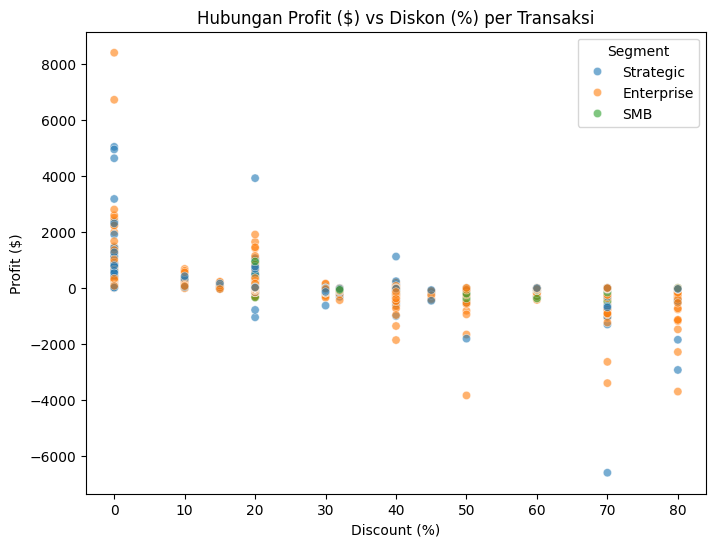

In [75]:
df_cleaned['Discount_pct'] = df_cleaned['Discount'] * 100

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Discount_pct', y='Profit', hue='Final Segment', alpha=0.6)

plt.title('Hubungan Profit ($) vs Diskon (%) per Transaksi')
plt.xlabel('Discount (%)')
plt.ylabel('Profit ($)')
plt.legend(title='Segment')
plt.show()

Hasil scatter plot pada Hubungan Profit vs Diskon bisa disimpulkan :
1. Banyak transaksi dengan diskon 0-20% menghasilkan profit positif tinggi.
2. Seiring diskon meningkat, profit cenderung menurun, bahkan ada beberapa transaksi profit negatif pada pemberian diskon tinggi (50-80%).
3. Beberapa outlier: ada transaksi dengan diskon rendah tapi profit sangat tinggi, terutama di segmen Enterprise. Ada juga beberapa transaksi dengan profit sangat negatif pada diskon tinggi di semua segmen.

Insight :
1. Diskon yang terlalu tinggi cenderung mengurangi profit per transaksi.
2. Segmen SMB lebih stabil tapi profit per transaksi lebih kecil.
3. Strategi diskon perlu hati-hati, terutama untuk transaksi besar di Enterprise dan Strategic, karena diskon tinggi bisa menyebabkan loss lebih tinggi juga.

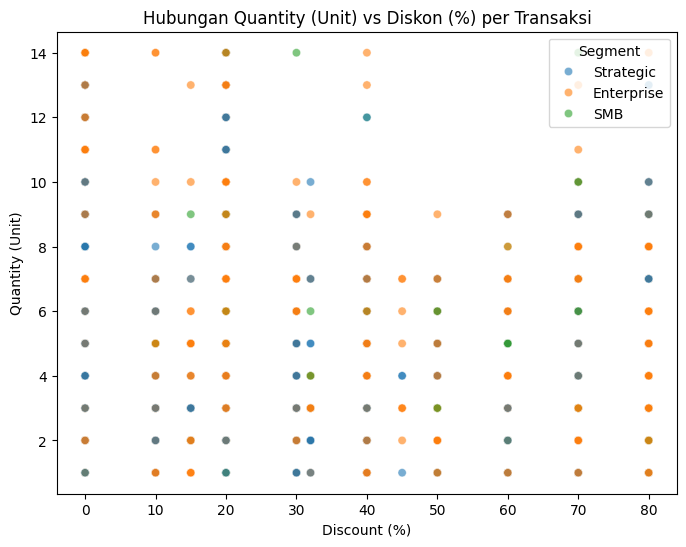

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Discount_pct', y='Quantity', hue='Final Segment', alpha=0.6)

plt.title('Hubungan Quantity (Unit) vs Diskon (%) per Transaksi')
plt.xlabel('Discount (%)')
plt.ylabel('Quantity (Unit)')
plt.legend(title='Segment')
plt.show()

Titik-titik tersebar cukup luas di sumbu Quantity dan Discount, menunjukkan tidak ada korelasi yang kuat antara jumlah unit yang dibeli dengan besarnya diskon.

Namun terlihat tren sedikit menurun untuk sebagian transaksi: beberapa transaksi dengan diskon tinggi cenderung memiliki Quantity lebih kecil (lebih jelas di segment Enterprise).

In [77]:
from scipy.stats import ttest_ind

Rata-rata Sales, Quantity, Profit (per segment & status diskon):
  Final Segment   Diskon_Status    Sales Quantity  Profit
0    Enterprise        Didiskon  $222.36   4 unit  $-7.58
1    Enterprise  Tidak Didiskon  $214.09   4 unit  $63.09
2           SMB        Didiskon  $170.17   4 unit  $-3.76
3           SMB  Tidak Didiskon  $176.01   4 unit  $48.39
4     Strategic        Didiskon  $288.05   4 unit  $-5.46
5     Strategic  Tidak Didiskon  $280.09   4 unit  $84.32

🔎 T-test Sales:
Strategic: t=0.237, p=0.813
Enterprise: t=0.586, p=0.558
SMB: t=-0.286, p=0.775

🔎 T-test Quantity:
Strategic: t=-1.336, p=0.182
Enterprise: t=0.316, p=0.752
SMB: t=-1.000, p=0.318

🔎 T-test Profit:
Strategic: t=-7.625, p=0.000
Enterprise: t=-12.677, p=0.000
SMB: t=-9.008, p=0.000


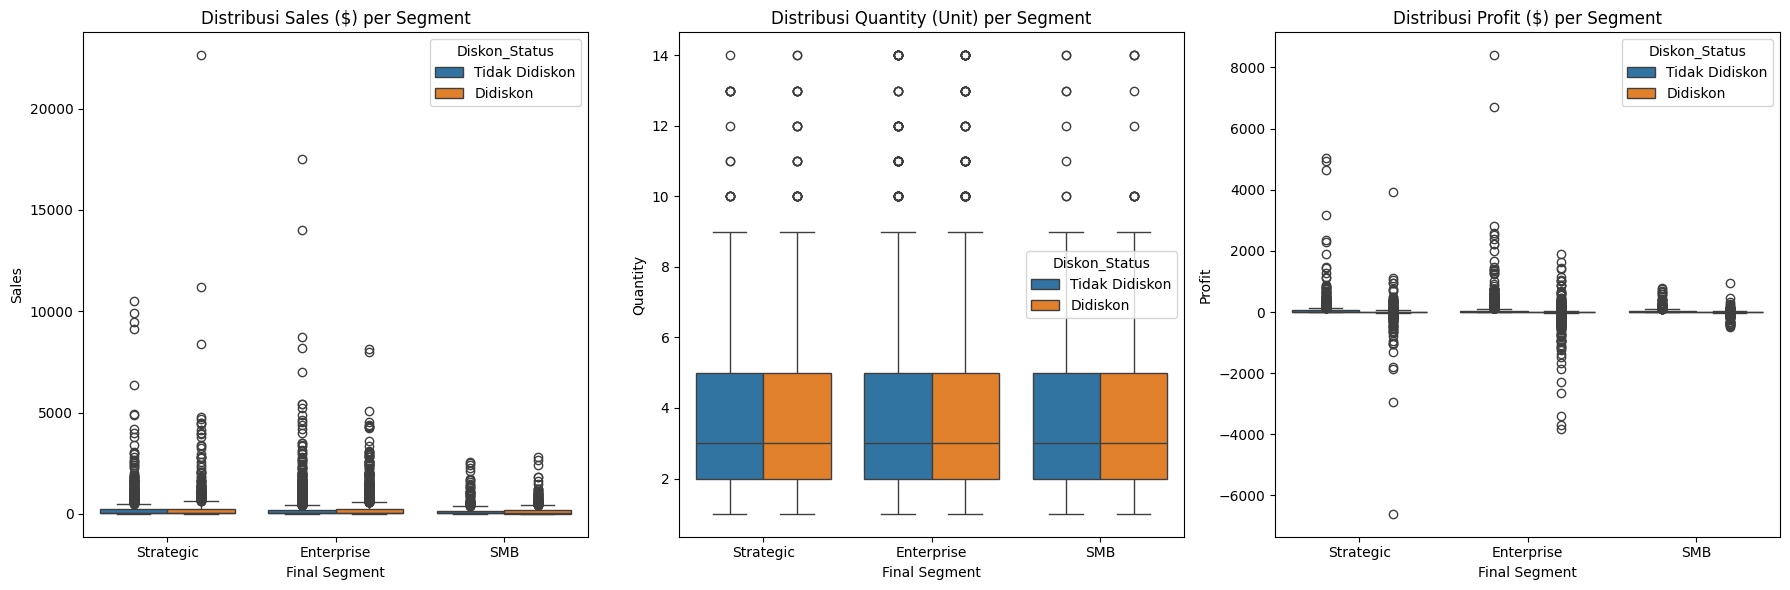

In [78]:
# 1. Kolom flag diskon
df_cleaned['Diskon_Status'] = df_cleaned['Discount'].apply(lambda x: 'Didiskon' if x > 0 else 'Tidak Didiskon')

# 2. Perbandingan rata-rata Sales, Quantity, Profit
comparison = df_cleaned.groupby(['Final Segment','Diskon_Status']).agg({
    'Sales':'mean',
    'Quantity':'mean',
    'Profit':'mean'
}).reset_index()

comparison['Sales'] = comparison['Sales'].apply(lambda x: f'${x:,.2f}')
comparison['Profit'] = comparison['Profit'].apply(lambda x: f'${x:,.2f}')
comparison['Quantity'] = comparison['Quantity'].apply(lambda x: f'{x:,.0f} unit')

print('Rata-rata Sales, Quantity, Profit (per segment & status diskon):')
print(comparison)

# 3. Uji statistik (T-test) untuk setiap metriks
from scipy.stats import ttest_ind

for metric in ['Sales','Quantity','Profit']:
    print(f'\n🔎 T-test {metric}:')
    for seg in df_cleaned['Final Segment'].unique():
        with_disc = df_cleaned[(df_cleaned['Final Segment']==seg) & (df_cleaned['Diskon_Status']=='Didiskon')][metric]
        without_disc = df_cleaned[(df_cleaned['Final Segment']==seg) & (df_cleaned['Diskon_Status']=='Tidak Didiskon')][metric]

        if len(with_disc) > 1 and len(without_disc) > 1:  # pastikan ada data cukup
            t_stat, p_val = ttest_ind(with_disc, without_disc, equal_var=False)
            print(f'{seg}: t={t_stat:.3f}, p={p_val:.3f}')
        else:
            print(f'{seg}: Data tidak cukup untuk uji')

# 4. Visualisasi Boxplot Sales, Quantity, Profit
fig, axes = plt.subplots(1,3, figsize=(18,6))

sns.boxplot(data=df_cleaned, x='Final Segment', y='Sales', hue='Diskon_Status', ax=axes[0])
axes[0].set_title('Distribusi Sales ($) per Segment')

sns.boxplot(data=df_cleaned, x='Final Segment', y='Quantity', hue='Diskon_Status', ax=axes[1])
axes[1].set_title('Distribusi Quantity (Unit) per Segment')

sns.boxplot(data=df_cleaned, x='Final Segment', y='Profit', hue='Diskon_Status', ax=axes[2])
axes[2].set_title('Distribusi Profit ($) per Segment')

plt.tight_layout()
plt.show()


Untuk uji lebih lanjut dilakukan uji t test pada analisa untuk mengetahui apakah ada perbedaan yang signifikan antara parameter yang diuji sebagai berikut :

1️⃣ Sales per segment (diskon vs tidak diskon)
Strategic: t = 0.237, p = 0.813
Enterprise: t = 0.586, p = 0.558
SMB: t = -0.286, p = 0.775

Semua p-value > 0.05 → **tidak ada perbedaan signifikan** antara transaksi yang diberikan diskon vs tidak diberikan diskon.
Dengan kata lain, **diskon tidak berpengaruh nyata** terhadap **Sales (Revenue)** di semua segment.

2️⃣ Quantity per segment
Strategic: t = -1.336, p = 0.182
Enterprise: t = 0.316, p = 0.752
SMB: t = -1.000, p = 0.318

Semua p-value > 0.05 → **tidak ada perbedaan signifikan** antara transaksi yang diberikan diskon vs tanpa diberikan diskon.

Sehingga, **diskon tidak berpengaruh nyata** pada **Quantity (unit)** yang terjual di semua segment.
**Customer tidak membeli lebih banyak meski ada diskon**

3️⃣ Profit per segment
Strategic: t = -7.625, p = 0.000
Enterprise: t = -12.677, p = 0.000
SMB: t = -9.008, p = 0.000

Semua p-value < 0.05 → **ada perbedaan signifikan** antara profitabilitas yang didapatkan dari transaksi yang diberikan diskon vs tidak diberikan diskon
Artinya **pemberian diskon justru konsisten menurunkan profit** di semua segment, meskipun Sales dan Quantity relatif tidak berubah.

Kesimpulan Utama
1. Diskon tidak meningkatkan revenue (Sales).
2. Diskon tidak meningkatkan jumlah pembelian (Quantity).
3. Diskon secara nyata menurunkan profit di semua segmen.

Dengan kata lain, strategi diskon dalam data ini tidak efektif untuk mendorong penjualan, malah merugikan perusahaan dari sisi profitabilitas.

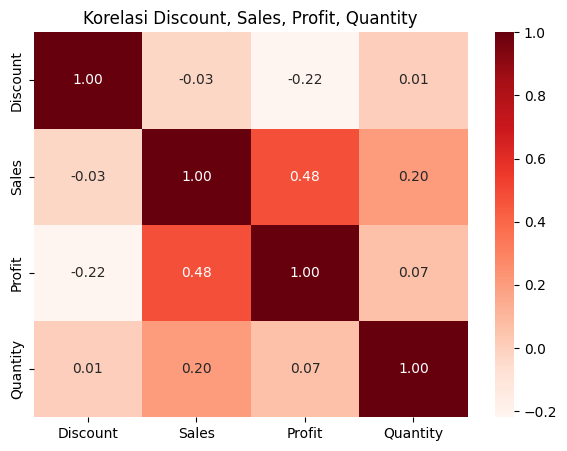

In [79]:
df_corr = df_cleaned.copy()

# Ubah Discount ke persen (%)
df_corr["Discount_pct"] = df_corr["Discount"] * 100

# Ambil kolom numerik yang mau dikorelasikan
corr = df_corr[["Discount","Sales","Profit","Quantity"]].corr()

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="Reds", fmt=".2f")
plt.title("Korelasi Discount, Sales, Profit, Quantity")
plt.show()

1. Discount vs Sales (-0.03)
Nilai korelasi mendekati nol, artinya tingkat diskon tidak memiliki pengaruh signifikan terhadap penjualan. Dengan kata lain, pemberian diskon pada dataset ini tidak secara langsung meningkatkan jumlah penjualan.

2. Discount vs Profit (-0.22)
Terdapat korelasi negatif lemah. Semakin besar diskon yang diberikan, profit cenderung menurun, meskipun tidak terlalu kuat. Hal ini wajar karena diskon bisa mengurangi profit.

3. Discount vs Quantity (0.01)
Nilai korelasi sangat mendekati nol, yang berarti diskon tidak berpengaruh terhadap jumlah unit yang dibeli pelanggan.

4. Sales vs Profit (0.48)
Korelasi positif sedang. Semakin tinggi sales, profit juga cenderung meningkat. Ini logis karena revenue yang lebih tinggi biasanya menghasilkan profit lebih besar, meski tidak selalu proporsional.

5. Sales vs Quantity (0.20)
Korelasi positif lemah. Penjualan lebih tinggi sedikit berhubungan dengan jumlah unit terjual. Kemungkinan ada transaksi nominal besar dengan unit kecil (harga tinggi), sehingga memengaruhi total sales tanpa menambah quantity.

6. Profit vs Quantity (0.07)
Korelasi positif sangat lemah. Jumlah unit yang terjual tidak berpengaruh terhadap profit. Hal ini bisa terjadi karena adanya variasi harga per unit dan kebijakan diskon yang berbeda-beda.

Kesimpulan utama:
1. Diskon tidak meningkatkan revenue (Sales).
2. Diskon tidak meningkatkan jumlah pembelian (Quantity).
3. Diskon secara nyata menurunkan profit di semua segmen.

Dengan kata lain, strategi diskon dalam data ini tidak efektif untuk mendorong penjualan, malah merugikan perusahaan dari sisi profitabilitas

# G. Kesimpulan dan Saran

### Ringkasan Insight

Enterprise → Paling tinggi dari sisi Sales & Profit total, tapi memberikan diskon paling banyak. Profit turun signifikan saat diskon diberikan.

Strategic → Sales dan Profit cukup besar, tapi paling banyak transaksi rugi saat diskon diberikan.

SMB → Paling kecil kontribusi Sales & Profit, tapi lebih stabil; diskon tidak banyak menurunkan profit, meski juga tidak menaikkan quantity secara signifikan.

Secara umum, diskon tidak terbukti mendorong peningkatan Sales ($) maupun Quantity (unit barang). Justru lebih banyak menekan profitabilitas, terutama di segment besar.

## Rekomendasi Utama

1. Batasi Pemberian Diskon di Enterprise & Strategic
- Pada kedua segment tersebut sudah menyumbang Sales besar tanpa diskon maka bisa difokuskan pada value-based selling (misalnya: layanan premium, after sales, kontrak jangka panjang) dibandingkan pemberian diskon.

2. SMB Bisa Jadi Target Diskon Selektif
- SMB punya profit stabil, pemberian diskon bisa digunakan secara terbatas (misalnya untuk produk baru atau layanan baru).

3. Ubah Strategi Diskon → Jadi Insentif Non-Monetary
- Alihkan dari “diskon harga” ke bonus value.
- Bundle package.
- Extended warranty.

4. Gunakan Diskon Lebih ke Marketing, Bukan Pricing
- Diskon bisa diposisikan sebagai campaign branding (“customer day”, “limited offer”) tapi jangan jadi strategi jangka panjang.
- Pastikan ada monitoring apakah diskon benar-benar menarik customer baru atau cuma mengurangi profit dari customer existing.

Next Step: Customer Segmentation by Behavior

Analisa lebih lanjut: apakah customer yang sering diberi diskon lebih loyal atau justru hanya beli saat diskon.

Hasil ini bisa jadi dasar apakah diskon layak dipertahankan untuk segment tertentu.